In [1]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [2]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

In [4]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile

In [5]:
survey  = 'gama'
version = 'GAMA4'
dryrun  = False

In [6]:
fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
86187,587722983890026653,185.64764412,0.45825774,17.885168,0.23773,4,G12_Y1_IN1_366,6,20.97136,19.13244,17.69423,17.180195,16.8645,0.23773,840.5726708609474,39.62287632944614,G12,0,0,-675.8062612682004,-66.83079688776589,5.431651350640607,676.2613794170416,62.116879849571745,4.6905186350961925,1.4382114,17.885168,1.0221831617635122,0,6,0.10036243227669306,0.5163907115532198,0.33652183845436306,0.9173801631494414,0.8573531163449608,0.8,-0.2305981,-0.190184,-21.84363198535866,-21.884046095184747,-22.074230092338983,39.72880006092018,39.9593981679005,39.76921417074627,-0.02610221695577676,0.25065673311151676,0.19062266140642437,0.51583202282518,-21.69773280831072,1.9148312,0.44663114086923167,0.0,-5.885168,0.019571442349045218,0.0,32958772.02542144
617429,588848900463329480,211.51215914,0.33337858,16.491335,0.05383,4,G15_Y6_072_126,6,18.441204,17.068653,16.389126,15.991108,15.69622,0.05383,168.3225606128227,36.13071164621924,G15,0,0,-136.1675749443299,-83.48335106299008,0.9293608415316806,136.7473174971628,82.53184613359454,0.779495741336187,0.6795273,16.491335,0.743982896440262,0,5,-0.1549470888593293,-0.2194027025847476,0.07143610749723148,0.0980003458903182,0.652963044321757,0.8,-0.052215103,-0.043064002,-19.65859773549533,-19.667748836607696,-19.710812838555338,36.14993265065647,36.202147753716474,36.15908375176883,-0.14544953276563438,-0.1915606934090779,0.07127534559656673,0.07361459630458539,-19.658436973594668,3.3086643,0.21805927999858019,0.0,-4.491335,0.007133602958665704,0.0,4474382.595745936
594128,588848899929800874,219.05986017,-0.07440745,17.661882,0.13694,5,344534744807008256,6,19.502266,18.28102,17.649033,17.278406,17.08318,0.13694,454.3391400668327,38.286900758504636,G15,0,0,-310.2965986762804,-251.81045450990524,-0.5189628516176182,312.04413432684754,249.64068275010177,-0.8609420807934335,0.6319866,17.661882,0.5739814157838801,0,4,-0.08154459967853901,-0.023539397420426808,0.13025891341234525,0.2316107736620236,0.5306347577923138,2.12,-0.13283181,-0.2903128,-20.622445459499378,-20.464964474573154,-20.755277271404285,38.28432786001208,38.417159671916984,38.12684687508585,-0.07849917485313306,-0.019353226563168485,0.13822570350906804,0.2458220631504948,-20.6304122495961,2.1381168,0.3781070072100413,0.0,-5.6618824,0.010322257113273553,0.0,20969684.250309538
619784,588848900467655041,221.331891,0.28400507,19.199787,0.2063,4,G15_Y2_014_259,6,22.054535,20.266598,19.106667,18.666481,18.32868,0.2063,715.7382006779324,39.27377098589429,G15,0,0,-445.5266613190083,-391.84432420106833,2.9410373795726867,448.2510540490064,388.72820986399864,2.449786808740405,1.1599312,19.199787,0.8740424713218576,0,6,0.025702647521857025,0.31159135906132757,0.25323595602057025,0.6765667657893946,0.7366003730925038,0.8,-0.20011102,-0.16504,-20.127108785391155,-20.16217980074912

In [7]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

FileNotFoundError: [Errno 2] No such file or directory: '/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_vmax.fits'

In [ ]:
try:
    gama_zmax['ZSURV'] = gama_zmax['ZGAMA']
    gama_vmax['ZSURV'] = gama_vmax['ZGAMA']

except:
    pass

In [ ]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [ ]:
np.unique(gama_vmax['ZMIN'].data)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

# ax.axvline(zmin, c='k', lw=0.5) 
# ax.axvline(zmax, c='k', lw=0.5) 
 
# ax.axhline(zmin, c='k', lw=0.5) 
# ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 1.55)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.0, 1.52)
ax.set_ylim(-23., -14.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

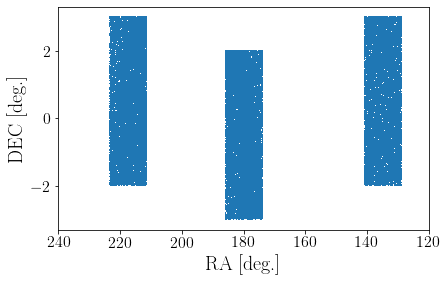

In [8]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [9]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
print(fpath)
gama_lf

FileNotFoundError: [Errno 2] No such file or directory: '/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_lumfn.fits'

In [10]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

NameError: name 'gama_vmax' is not defined

In [11]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

NameError: name 'gama_vmax' is not defined

In [17]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,0.08647,276.9712644440074,37.212173568413235,G15,0,0,-202.7981329939006,-154.36433581903054,5.717037181843526,203.87570449418823,152.94650317502666,5.493606859874317,0.039456367,14.456577,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,-22.818599066841177,37.19130046586948,37.27517636786657,37.09185997317987,-0.11433057873334761,-0.13142393692472373,0.1023942996288535,0.13375135278893954,-22.774114665019606,5.343422,1.132744454867847,1.0,-2.4565773,0.02777756171179855,0.0,327574420.10070616
744812,588848899391553693,216.01587484,-0.44945953,16.054071,0.15084,4,2dF326935,4,16.147621,16.111952,16.034607,15.675366,15.818611,0.15084,505.1235453874863,38.516988064038,G15,0,0,-355.0090954470957,-258.07951929980237,-3.443072396188473,356.79602583034824,255.59782182367553,-3.8340983776867654,0.077344894,16.054071,0.011981082513680429,0,1,-0.14064978791986665,-0.07528597602436739,0.02063093138650743,0.05255863546425736,0.045417190331429755,2.12,-0.1463148,-0.31978077,-22.337232769247294,-22.16376680206895,-22.483547569032908,38.391304195638895,38.53761899542451,38.21783822846055,-0.07043628594909188,0.014909750943757683,0.14628859241310924,0.28008504065742096,-22.462890430273898,3.7459278,1.132744454867847,1.0,-4.0540714,0.022398121456460918,0.0,327579345.86650085
692601,587722982813597718,179.49471019,-0.37245575,16.60492,0.25969,5,320958471644145664,4,16.735159,16.709875,16.608656,16.612415,16.397074,0.25969,930.0556531563092,39.84254468435853,G12,0,0,-738.2767203979257,6.511009681915217,-4.799480498670677,738.2076689830435,-11.65874056992238,-5.608508232766647,0.10121918,16.60492,-0.15293528763528672,0,1,-0.23445722079698095,0.01969724408439949,-0.07317650149060687,0.14754185557302424,-0.11949917981753735,2.12,-0.2518993,-0.5505428,-22.912549447268404,-22.613905977457918,-23.16444874927417,39.517468880862154,39.76936818286792,39.21882541105167,-0.014158631982032044,0.3132406181443799,0.20256624638016907,0.5784159078580432,-23.18829219513918,3.1950798,1.132744454867847,1.0,-4.6049194,0.027507759565571062,0.0,327574718.34181285
718219,587726031709143149,174.27852978,1.66330888,17.011429,0.1922,5,577616922149939200,4,16.936327,17.022623,16.986746,16.462774,16.756363,0.1922,661.0039524686264,39.10102028177148,G12,0,0,-551.4460014026894,55.25033602556996,16.093267502728505,551.0646495813354,-59.09414037840911,15.489348198188235,0.035877228,17.011429,-0.09967619755245778,0,1,-0.17955634397698023,-0.04400291864131932,-0.018275624670606144,0.08384169284730543,-0.06624008973470845,2.12,-0.18643402,-0.40

In [18]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64


# Done.